# TOP INSIGHTS FROM THE BIKE SHARING ANALYSIS

### by Samuel Tumilara Familusi

## Investigation Overview

In the investigation carried out on the bike sharing dataset, I explored the bike trip duration, and how different parameters can affect the trip duration. I found that user type, gender and start day, and what hour trips start in the day are important keys parameters that affect the bike trip duration



## Dataset Overview 

This data set includes information about individual rides made in a ford bike-sharing system covering the greater San Francisco Bay area in February 2019, it has 183412 rowa and various columns containing features such as the duration, longitude, latitude.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
ford_bikes = pd.read_csv("201902-fordgobike-tripdata.csv")

In [3]:
# clean the dataset
# remove the null values
ford_bikes = ford_bikes.dropna()

# remove the columns that are unrelated to the research question
ford_bikes.drop(columns=['start_station_id', 'start_station_name', 
                                 'end_station_id', 'end_station_name', 'bike_id'], inplace=True)

# filter out the outlier of 'duration_sec'
ford_bikes = ford_bikes.query('duration_sec <= 20000')

In [4]:

#Change the start and end time columns to data time Datetime
ford_bikes['start_time'] = pd.to_datetime(ford_bikes['start_time'])
ford_bikes['end_time'] = pd.to_datetime(ford_bikes['end_time'])

#Change the data type to a categorical datatype for the user type column
ford_bikes['user_type'] = ford_bikes['user_type'].astype('category')


# extract the month, day, and day of week from the 'start_day'
ford_bikes['start_day'] = ford_bikes['start_time'].dt.day_name()
ford_bikes['start_month'] = ford_bikes['start_time'].dt.month_name()
ford_bikes['start_year'] = ford_bikes['start_time'].dt.year
ford_bikes['start_hr'] = ford_bikes['start_time'].dt.hour
ford_bikes['start_hr'] = ford_bikes.start_hr.astype(str)

## Visualization 1 : Duration Distribution


The duration distribution was skewed to the right due to outliers. These outliers were dropped, and I applied a log transform to the duration resulting in a unimodal distribution with its peak around 550

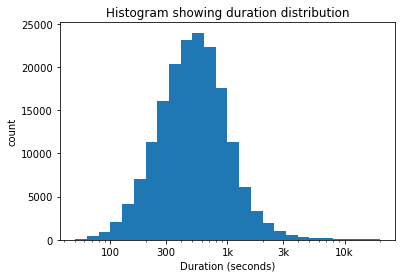

In [5]:
# set bins and ticks for the duration histogram
bins = 10 ** np.arange(1.7, 4.3+0.1, 0.1)
ticks = [100, 300, 1000, 3000, 10000]
labels = [100, 300, '1k', '3k', '10k']

# plot the histogram
plt.hist(data = ford_bikes, x='duration_sec', bins=bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.ylabel('count')
plt.xlabel('Duration (seconds)')
plt.title('Histogram showing duration distribution');

## Visualization 2 : Distribution of User Type

Investigating the user type shows that Subscribers take a lot more trips than regular customers 

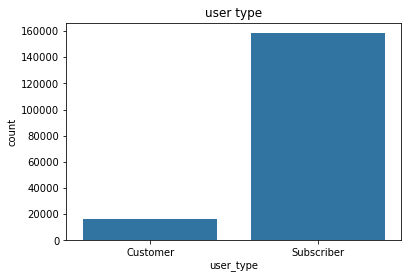

In [6]:
# plot data related to 'user_type'
base_color = sb.color_palette()[0]
sb.countplot(data=ford_bikes, x='user_type', color=base_color)
plt.title('user type');

## Visualization 3 : Distribution of Start day, user type, gender and duration

Investigation how these multi values shows that customers ride for a longer duration on average, while men ride the least. It also shows that the duration of rides are higher on saturdays and sundays. 

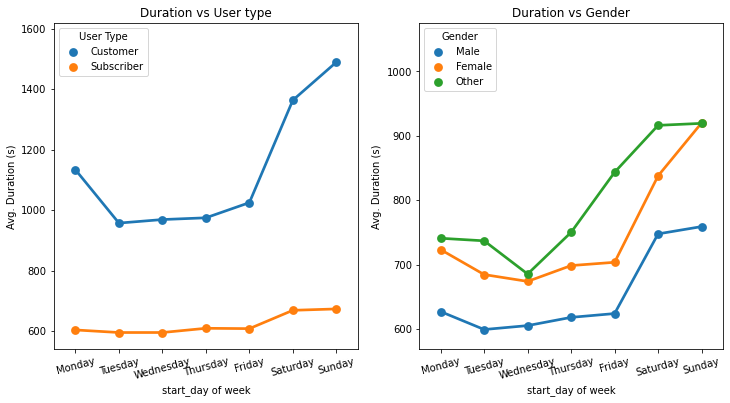

In [8]:
plt.figure(figsize=[12,6])
day_order = ['Monday', 'Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
# plot the point plot of month vs user type
plt.subplot(1, 2, 1)
sb.pointplot(data=ford_bikes, x='start_day', y='duration_sec', hue='user_type', errwidth=0, order = day_order)
plt.xlabel('start_day of week')
plt.ylabel('Avg. Duration (s)')
plt.legend(title='User Type')
plt.title('Duration vs User type')
plt.xticks(rotation=15);

# plot the point plot of month vs gender
plt.subplot(1, 2, 2)
sb.pointplot(data=ford_bikes, x='start_day', y='duration_sec', hue='member_gender', errwidth=0, order = day_order)
plt.xlabel('start_day of week')
plt.ylabel('Avg. Duration (s)')
plt.legend(title='Gender')
plt.xticks(rotation=15);
plt.title('Duration vs Gender');

# Insights into the data 

1. People spend longer riding on saturdays and sundays 
2. There are more people renting bikes for trips to and from work 
3. There is an even distribution of genders but there are more male riders.
4. There is very little correlation between duration and distance 

# Recommendation

1. The  organization should look into converting more customers to subscribers
    a. They could offer work hour riders that are not subscribers a deal 
    b. They could offer female riders a coupon. This will drive up female riders and evental subscribers 